In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

In [2]:
#Read csv
url = "https://raw.githubusercontent.com/amelfraisse/HAL-LO/main/datasets/data_contributeurs.csv" 
download = requests.get(url).content

colnames=['UnivSigle', 'UnivNum', 'Label', 'UniteSigle', 'UniteNom', 'Collection', 'Secteur', 'Discipline', 'AnneeDepot', 'NbDepotLabo', 'ContributeurNom', 'NbDepotContributeur'] 
dataframe = pd.read_csv(io.StringIO(download.decode('latin-1')), sep =';', names = colnames, header=0)

dataframe.head()

,UnivSigle,UnivNum,Label,UniteSigle,UniteNom,Collection,Secteur,Discipline,AnneeDepot,NbDepotLabo,ContributeurNom,NbDepotContributeur
0,Saclay,Saclay-187,NaN,LTCI,Laboratoire traitement et communication de l'i...,LTCI,Science technologie,Sciences et technologies de l'information et d...,2019,3064,Telecomparis Hal,2401
1,UGA,UGA-018,UPR 5301,CERMAV,Centre de Recherches sur les Macromolécules Vé...,CERMAV,Science technologie,Chimie;Biologie medecine et sante;Sciences pou...,2008,2199,Michèle Carret,2179
2,UDL,UDL-092,UMR 5205,LIRIS,Laboratoire d'InfoRmatique en Image et Système...,LIRIS,Science technologie,Sciences et technologies de l'information et d...,2017,2548,Équipe Gestionnaire Des Publications Si Liris,2041
3,UGA,UGA-012,UMR 0042,CARRTEL,Centre Alpin de Recherche sur les Réseaux Trop...,NaN,Science technologie,Sciences agronomiques et ecologiques,2020,2145,Migration Prodinra,1942
4,UDL,UDL-145,UMR 1213,Herbivores,Unité Mixte de Recherche Herbivores,NaN,SDV santé,Sciences agronomiques et ecologiques,2020,2149,Migration Prodinra,1824


<AxesSubplot:xlabel='AnneeDepot'>

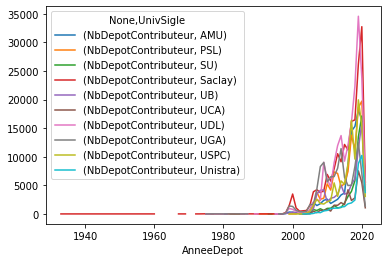

In [10]:
#Quick analysis per year
dfUnivAnnee = pd.pivot_table(
   dataframe,
   index=['UnivSigle'],
   columns=['AnneeDepot'],
   aggfunc={'NbDepotContributeur': np.sum})

dfUnivAnnee = pd.pivot_table(
   dataframe,
   index=['AnneeDepot'],
   columns=['UnivSigle'],
   aggfunc={'NbDepotContributeur': np.sum})

dfUnivAnnee.head(100)

dfUnivAnnee.plot()

In [ ]:
#Exclude data before 2001
